In [1]:
import findspark
findspark.init()

In [2]:
import datetime
import pickle
from urllib.request import urlopen
import os
import pandas as pd
import numpy as np
import gensim
import pickle
import matplotlib.pyplot as plt

import heapq

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/Galeforse/DST-Assessment-05/main/Data/NCSC%20Reports.csv')

In [13]:
df.head()

,Unnamed: 0,Title,Article,topics,Links
0,0,23rd April 2021,['The NCSC is aware that a malicious piece of ...,"['Cyber attack', 'Cyber strategy', 'Education'...",https://www.ncsc.gov.uk/report/weekly-threat-r...
1,1,16th April 2021,['Cyber security researchers have uncovered a ...,"['Cyber strategy', 'Patching', 'Vulnerabilities']",https://www.ncsc.gov.uk/report/weekly-threat-r...
2,2,12th April 2021,"['Cyber security researchers, Esentire, have w...","['Phishing', 'Social media', 'Personal data', ...",https://www.ncsc.gov.uk/report/weekly-threat-r...
3,3,2nd April 2021,['The UK education sector continues to face an...,"['Education', 'Incident management', 'Secure d...",https://www.ncsc.gov.uk/report/weekly-threat-r...
4,4,26th March 2021,['Earlier this month Microsoft confirmed that ...,"['Cyber attack', 'Education', 'Mitigation', 'P...",https://www.ncsc.gov.uk/report/weekly-threat-r...


In [10]:
print(np.shape(df))

(221, 5)


In [11]:
df.iloc[4,2]

"['Earlier this month Microsoft confirmed that sophisticated actors had attacked a number of Exchange servers and have released multiple security updates since.\\nThe NCSC is strongly urging any organisation using affected versions to proactively search their system for evidence of compromise, in line with Microsoft guidance.\\nOur alert was updated last week with the most recent advice and guidance.', 'A new report has revealed that almost 40% of UK businesses experienced a cyber attack last year.', 'The Cyber Security Breaches Survey 2021 report, published by the Department of Digital, Culture, Media and Sport (DCMS), also revealed that a quarter of charities have suffered a cyber security breach or attack in the past 12 months.', 'The NCSC has produced guidance to address some of the most common breaches and attacks identified in the report:\\nphishing emails\\nviruses\\nransomware\\nWhere a breach has resulted in a loss of data or assets, the average cost of a cyber attack on a bus

In [60]:
# nltk.download('stopwords')
# nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\axl_a\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [10]:
import nltk
from nltk.corpus import stopwords

In [13]:
l1 = stopwords.words('english')
l2 = ['have', 'with', 'cannot', 'all', 'more', 'less', 'fewer', 'if', 'from', 'new', 'old', 'be', 'This']
l1.append(l2)
lst1 = [' {} '.format(x) for x in l1]

len(lst1)

180

In [14]:
df['Article'].replace(lst1, " ", regex=True, inplace=True)
df['Article'].replace(r'[^\w\s]', " ", regex=True, inplace=True)
df['Article'].replace('[0-9999999999]', " ", regex=True, inplace=True)

In [15]:
df.iloc[4,2]

'  Earlier month Microsoft confirmed sophisticated actors attacked number Exchange servers released multiple security updates since  nThe NCSC strongly urging organisation using affected versions proactively search system evidence compromise  line Microsoft guidance  nOur alert updated last week recent advice guidance     A new report revealed almost     UK businesses experienced cyber attack last year     The Cyber Security Breaches Survey      report  published Department Digital  Culture  Media Sport  DCMS   also revealed quarter charities suffered cyber security breach attack past    months     The NCSC produced guidance address common breaches attacks identified report  nphishing emails nviruses nransomware nWhere breach resulted loss data assets  average cost cyber attack business         This figure rises         medium large businesses  nThe report also shows cyber risk organisations heightened pandemic  made securing digital environments challenging resources diverted facilita

In [16]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [17]:
# nltk.download('wordnet')
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [18]:
df_lem = df['Article'].apply(lemmatize_text)

In [19]:
df_lem

0      [The, NCSC, aware, malicious, piece, spyware, ...
1      [Cyber, security, researcher, uncovered, serie...
2      [Cyber, security, researcher, Esentire, warned...
3      [The, UK, education, sector, continues, face, ...
4      [Earlier, month, Microsoft, confirmed, sophist...
                             ...                        
216    [Malware, infected, ATMs, compromise, Indian, ...
217    [Threat, assessment, trend, analysis, nOnline,...
218    [New, Trojan, used, financial, attack, nSymant...
219    [Threat, assessment, trend, analysis, nDressco...
220    [Threat, assessment, trend, analysis, nYahoo, ...
Name: Article, Length: 221, dtype: object

In [20]:
df_lem_list = df_lem.values.tolist()

In [21]:
lister = [[] for x in range(len(df_lem))]
for i in range(len(df_lem_list)):
    l = df_lem_list[i]
    for token in l:
        if (len(token)>4 or token.isupper()):
            lister[i].append(token)

lister[0:1]

[['NCSC',
  'aware',
  'malicious',
  'piece',
  'spyware',
  'known',
  'FluBot',
  'affecting',
  'Android',
  'phone',
  'device',
  'across',
  'UK',
  'spyware',
  'installed',
  'victim',
  'receives',
  'message',
  'asking',
  'install',
  'tracking',
  'missed',
  'package',
  'delivery',
  'nScammers',
  'cyber',
  'criminal',
  'regularly',
  'exploit',
  'known',
  'trusted',
  'brand',
  'personal',
  'FluBot',
  'campaign',
  'prime',
  'example',
  'nAndroid',
  'urged',
  'familiarise',
  'guidance',
  'vigilant',
  'suspicious',
  'looking',
  'message',
  'forwarded',
  'Earlier',
  'FireEye',
  'published',
  'saying',
  'APT',
  'actor',
  'actively',
  'exploiting',
  'vulnerability',
  'Pulse',
  'Connect',
  'VPN',
  'appliance',
  'follows',
  'security',
  'update',
  'Pulse',
  'Secure',
  'recently',
  'discovered',
  'limited',
  'number',
  'customer',
  'experienced',
  'evidence',
  'exploit',
  'behaviour',
  'Pulse',
  'Connect',
  'Secure',
  'PCS',
  

In [22]:
dictionary = gensim.corpora.Dictionary(lister)

In [23]:
bow_corpus = [dictionary.doc2bow(doc) for doc in lister]
tfidf=gensim.models.TfidfModel(bow_corpus)
tfidf_corp = tfidf[bow_corpus]

In [24]:
bow_corpus[0:1]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 3),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 3),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 3),
  (21, 1),
  (22, 4),
  (23, 1),
  (24, 3),
  (25, 2),
  (26, 2),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 1),
  (38, 2),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 3),
  (47, 1),
  (48, 5),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 2),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 2),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 2)

In [25]:
lda_model_tfidf = gensim.models.LdaMulticore(tfidf_corp, num_topics=6, id2word=dictionary, passes=2, workers=4)

In [26]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [27]:
lda_display = pyLDAvis.gensim.prepare(lda_model_tfidf, tfidf_corp, 
                                          dictionary, mds='mmds')
pyLDAvis.display(lda_display, template_type='notebook')

In [28]:
from gensim.models.coherencemodel import CoherenceModel
def getCoherence(m,t,d):
    coherence_model_lda = CoherenceModel(model=m,texts=t, dictionary=d, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return(coherence_lda) # Need high coherence

In [29]:
getCoherence(m=lda_model_tfidf, t=lister, d =dictionary)

0.31375572009056085

In [30]:
perplex = lda_model_tfidf.log_perplexity(tfidf_corp)

In [31]:
perplex

-11.769003617608053

In [32]:
begin_time = datetime.datetime.now()
gCH = [0] * 50
for i in range(1,50):
    locals()['lda_model_tfidf_{}'.format(i)] = gensim.models.LdaMulticore(tfidf_corp, num_topics=i, id2word=dictionary, passes=2, workers=1)
    gCH[i]=getCoherence(m=locals()['lda_model_tfidf_{}'.format(i)], t=lister, d =dictionary)
end_time = datetime.datetime.now()
time_weak_coh = (end_time - begin_time)

print(time_weak_coh)

0:09:16.785849


In [33]:
begin_time = datetime.datetime.now()
gCH = [0] * 50
for i in range(1,50):
    locals()['lda_model_tfidf_{}'.format(i)] = gensim.models.LdaMulticore(tfidf_corp, num_topics=i, id2word=dictionary, passes=2, workers=6)
    gCH[i]=getCoherence(m=locals()['lda_model_tfidf_{}'.format(i)], t=lister, d =dictionary)
end_time = datetime.datetime.now()
time_coh = (end_time - begin_time)

print(time_coh)

0:09:41.060481


In [34]:
begin_time = datetime.datetime.now()
perplexity = [0] * 50
for i in range(1,50):
    perplexity[i]=locals()['lda_model_tfidf_{}'.format(i)].log_perplexity(tfidf_corp)
end_time = datetime.datetime.now()
time_perp = (end_time - begin_time)

print(time_perp)

0:00:28.353731


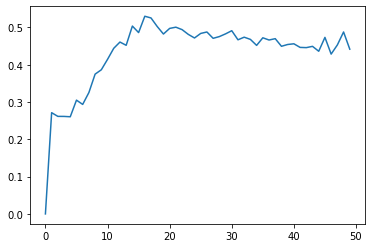

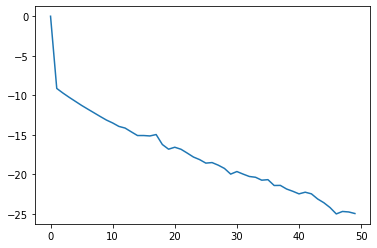

In [35]:
plt.plot(gCH)
plt.show()
plt.plot(perplexity)
plt.show()

In [36]:
print("The maximum coherence achieved is", max(gCH), "and its corresponding number of topics is", np.argmax(gCH))
print("The minimum perplexity achieved is", min(perplexity), "and its corresponding number of topics is", np.argmin(perplexity))

The maximum coherence achieved is 0.5300425989437229 and its corresponding number of topics is 16
The minimum perplexity achieved is -25.023112522673884 and its corresponding number of topics is 46


In [38]:
lda_display = pyLDAvis.gensim.prepare(lda_model_tfidf_16, tfidf_corp, 
                                          dictionary, mds='mmds')
pyLDAvis.display(lda_display, template_type='notebook')

## pyspark

In [3]:
# !pip create -n sparknlp python=3.7 -y
# !pip activate sparknlp
# !pip install spark-nlp==3.0.2 pyspark==3.1.1

In [4]:
import sparknlp
sparknlp = sparknlp.start()

In [5]:
# from pyspark import SparkContext
# print(SparkContext.version)

# sc = SparkContext()
# sc

In [6]:
from sparknlp.base import Finisher, DocumentAssembler
from sparknlp.annotator import (Tokenizer, Normalizer,
                                Lemmatizer, StopWordsCleaner)
from pyspark.ml import Pipeline

In [43]:
import nltk
from nltk.corpus import stopwords

from nltk.corpus import words

In [8]:
eng_stopwords = stopwords.words('english')
eng_words = words.words()

In [31]:
documentAssembler = DocumentAssembler() \
     .setInputCol('Article') \
     .setOutputCol('Articles')

tokenizer = Tokenizer() \
     .setInputCols(['Articles']) \
     .setOutputCol('token')

normalizer = Normalizer() \
     .setInputCols(['token']) \
     .setOutputCol('normalized') \
     .setLowercase(True)

lemmatizer = Lemmatizer() \
     .setInputCols(['normalized']) \
     .setOutputCol('lemma') \
     .setDictionary("AntBNC_lemmas_ver_001.txt", "->", "\t")

stopwords_cleaner = StopWordsCleaner() \
     .setInputCols(['lemma']) \
     .setOutputCol('clean_lemma') \
     .setCaseSensitive(False) \
     .setStopWords(eng_stopwords)

finisher = Finisher() \
     .setInputCols(['clean_lemma']) \
     .setCleanAnnotations(False)

In [32]:
pipeline = Pipeline() \
     .setStages([
           documentAssembler,
           tokenizer,
           normalizer,
           # lemmatizer,
           # stopwords_cleaner,
           # finisher
     ])

In [33]:
df.to_csv('NCSC Reports.csv')

In [34]:
#df = sparknlp.read.format("NCSC Reports.csv", format="csv", header="true")
# df = sparknlp.sql("SELECT * FROM csv.`NCSC Reports.csv`")
dfs = sparknlp.read.load("NCSC Reports.csv",format='csv', header = "true")

In [35]:
dfs.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- Unnamed: 0: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Article: string (nullable = true)
 |-- topics: string (nullable = true)
 |-- Links: string (nullable = true)



In [36]:
pd.DataFrame(dfs.take(10), columns=dfs.columns)

,_c0,Unnamed: 0,Title,Article,topics,Links
0,0,0,23rd April 2021,['The NCSC is aware that a malicious piece of ...,"['Cyber attack', 'Cyber strategy', 'Education'...",https://www.ncsc.gov.uk/report/weekly-threat-r...
1,1,1,16th April 2021,['Cyber security researchers have uncovered a ...,"['Cyber strategy', 'Patching', 'Vulnerabilities']",https://www.ncsc.gov.uk/report/weekly-threat-r...
2,2,2,12th April 2021,"['Cyber security researchers, Esentire, have w...","['Phishing', 'Social media', 'Personal data', ...",https://www.ncsc.gov.uk/report/weekly-threat-r...
3,3,3,2nd April 2021,['The UK education sector continues to face an...,"['Education', 'Incident management', 'Secure d...",https://www.ncsc.gov.uk/report/weekly-threat-r...
4,4,4,26th March 2021,['Earlier this month Microsoft confirmed that ...,"['Cyber attack', 'Education', 'Mitigation', 'P...",https://www.ncsc.gov.uk/report/weekly-threat-r...
5,5,5,19th March 2021,['Courier service company Fastway said this we...,"['Cyber attack', 'Personal data', 'Phishing', ...",https://www.ncsc.gov.uk/report/weekly-threat-r...
6,6,6,12th March 2021,['There has been a rise in vulnerability repor...,"['Cyber threat', 'Risk management', 'Vulnerabi...",https://www.ncsc.gov.uk/report/weekly-threat-r...
7,7,7,5th March 2021,['Microsoft has released a number of security ...,"['Cyber threat', 'Patching', 'Personal data', ...",https://www.ncsc.gov.uk/report/weekly-threat-r...
8,8,8,26th February 2021,['VMware have released security updates to add...,"['Cyber attack', 'Vulnerabilities']",https://www.ncsc.gov.uk/report/weekly-threat-r...
9,9,9,19th February 2021,"['Scam emails, which aim to convince people to...","['Cyber attack', 'Personal data', 'Phishing', ...",https://www.ncsc.gov.uk/report/weekly-threat-r...


In [37]:
# conda install -c cyclus java-jdk 

In [39]:
NCSC_pipeline = pipeline.fit(dfs).transform(dfs)

In [40]:
NCSC_pipeline.columns

['_c0',
 'Unnamed: 0',
 'Title',
 'Article',
 'topics',
 'Links',
 'Articles',
 'token',
 'normalized']

In [41]:
from pyspark.sql.functions import explode, col


In [44]:
NCSC_pipeline_words = NCSC_pipeline_words.withColumn('exploded_text', 
                               explode(col('finished_clean_lemma')))

NameError: name 'NCSC_pipeline_words' is not defined

In [ ]:
counts = NCSC_pipeline_words.groupby('exploded_text').count()
counts_pd = counts.toPandas()
NCSC_pipeline_dict = {counts_pd.loc[i, 'exploded_text']: 
                counts_pd.loc[i, 'count'] 
                for i in range(counts_pd.shape[0])}

**TF-IDF**

In [46]:
Dates = df['Title'].tolist()

In [51]:
report_counts_dict = {date: {} for date in Dates}

In [ ]:
for date in Dates:
    # print(date)
    date_df = dfs.filter((dfs['Title'] == date) & (dfs['Article'].isNull() == False))
    data = date_df.select('Article')
    
    # process narratives into counts dictionary
    clean_data = pipeline.fit(data).transform(data)
    clean_data_exploded = clean_data.withColumn("exploded_text", explode(col("finished_clean_lemma")))
    counts = clean_data_exploded.groupby('exploded_text').count().toPandas()
    counts_dict = {counts.loc[i, 'exploded_text']: counts.loc[i, 'count'] for i in range(counts.shape[0])}
    
    # add counts to dictionary
    report_counts_dict[date] = counts_dict

In [45]:
def term_frequency(BoW_dict):
    tot_words = sum(BoW_dict.values())
    freq_dict = {word: BoW_dict[word]/tot_words for word in BoW_dict.keys()}
    return freq_dict
        
from math import log

def inverse_document_frequency(list_of_dicts):
    tot_docs = len(list_of_dicts)
    words = set([w for w_dict in list_of_dicts for w in w_dict.keys()])
    idf_dict = {word: log(float(tot_docs)/(1.0 + sum([1 for w_dict in list_of_dicts if word in w_dict.keys()]))) for word in words}
    return idf_dict

def tf_idf(list_of_dicts):
    words = set([w for w_dict in list_of_dicts for w in w_dict.keys()]) 
    tf_idf_dicts = []
    idfs = inverse_document_frequency(list_of_dicts)
    for i, w_dict in enumerate(list_of_dicts):
        w_dict.update({word: 0 for word in words if word not in w_dict.keys()})
        tf = term_frequency(w_dict)
        tf_idf_dicts.append({word: tf[word]*idfs[word] for word in words})
    return tf_idf_dicts

In [ ]:
list_of_word_dicts = [report_counts_dict[date] for date in Dates]
tf_idf_by_date_list = tf_idf(list_of_word_dicts)
tf_idf_by_date_dict = {c: tf_dict for c, tf_dict in zip(Dates, tf_idf_by_date_list)}

In [ ]:
z = np.zeros((221,2))
op = pd.DataFrame(z)
op.columns = ['Date', 'Words']

In [ ]:
for num, date in enumerate(Dates[0:220]):
    words=[]
    print ("\n", date)
    tf_idf_dict = tf_idf_by_date_dict[date]
    t10 = heapq.nlargest(10, tf_idf_dict, key=tf_idf_dict.get)
    t10 = {word: tf_idf_dict[word] for word in t10}
    t10 = [(k, v) for k, v in zip(t10.keys(), t10.values())]
    t10 = sorted(t10, key=lambda x: x[1], reverse=True)
    
    counter = 0
    for word, tfidf in t10:
        if counter < 10:
            if word in eng_words:
                counter= counter+ 1
                print (word, tfidf)
                words.append(word)
    op.iloc[i,1] = words